In [3]:
import cv2  # Importa la biblioteca OpenCV para procesamiento de imágenes.
from IPython.display import Image  # Importa la función Image de IPython para mostrar imágenes en el notebook.
import numpy as np  # Importa la biblioteca NumPy para manipulación de matrices y cálculos numéricos.
from matplotlib import pyplot as plt  # Importa matplotlib para visualización de datos, especialmente gráficos.
import matplotlib.image as mpimg  # Importa la función mpimg de matplotlib para leer y mostrar imágenes.
from scipy.signal import convolve2d as conv2  # Importa la función convolve2d de scipy.signal para convolución 2D.


In [ ]:
# Lee la imagen como escala de grises desde la ruta especificada
img = cv2.imread('/home/juan/Documentos/Documentos_UN/2024-1/Clases/Tecnicas_de_IA/tecinas_IA/Talleres/Taller_2/plasmodium_falciparum.png',0)

# Muestra la imagen en escala de gris
plt.imshow(img, cmap="gray")


In [ ]:
# Aplica el filtro Prewitt en ocho direcciones a una imagen.

# Definir las matrices del filtro Prewitt
def filtro_prewitt(imagen):
    # Lista de nombres de direcciones
    direcciones = ["Norte", "Noreste", "Este", "Sureste", "Sur", "Suroeste", "Oeste", "Noroeste"]
    # Kernels para el filtro Prewitt en ocho direcciones
    kernels = [
        np.array([[-1, -1, -1],
                  [ 1, -2,  1],
                  [ 1,  1,  1]]),
        np.array([[ 1, -1, -1],
                  [ 1, -2, -1],
                  [ 1,  1,  1]]),
        np.array([[ 1,  1, -1],
                  [ 1, -2, -1],
                  [ 1,  1, -1]]),
        np.array([[ 1,  1,  1],
                  [ 1, -2, -1],
                  [ 1, -1, -1]]),
        np.array([[ 1,  1,  1],
                  [ 1, -2,  1],
                  [-1, -1, -1]]),
        np.array([[ 1,  1,  1],
                  [-1, -2,  1],
                  [-1, -1,  1]]),
        np.array([[-1,  1,  1],
                  [-1, -2,  1],
                  [-1,  1,  1]]),
        np.array([[-1, -1,  1],
                  [-1, -2,  1],
                  [ 1,  1,  1]])
    ]

    # Aplicar el filtro en cada dirección
    imagenes_filtradas = []
    for i in range(len(direcciones)):
        imagen_convolucionada = cv2.filter2D(imagen, -1, kernels[i])
        imagenes_filtradas.append(imagen_convolucionada)

    return imagenes_filtradas, direcciones

# Ejemplo de uso

# Llama a la función filtro_prewitt con una imagen como argumento
imagenes_filtradas, direcciones = filtro_prewitt(img)

# Visualizar las imágenes filtradas
for i in range(len(imagenes_filtradas)):
    plt.subplot(3, 3, i+1)
    plt.imshow(imagenes_filtradas[i], cmap="gray")
    plt.title(direcciones[i])
    plt.xticks([])
    plt.yticks([])

plt.show()


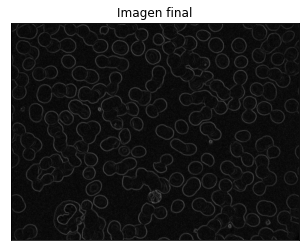

In [ ]:
def filtro_prewitt(imagen):
    # Lista de nombres de direcciones
    direcciones = ["Norte", "Noreste", "Este", "Sureste", "Sur", "Suroeste", "Oeste", "Noroeste"]
    # Kernels para el filtro Prewitt en ocho direcciones
    kernels = [
        np.array([[-1, -1, -1],
                  [ 1, -2,  1],
                  [ 1,  1,  1]]),
        np.array([[ 1, -1, -1],
                  [ 1, -2, -1],
                  [ 1,  1,  1]]),
        np.array([[ 1,  1, -1],
                  [ 1, -2, -1],
                  [ 1,  1, -1]]),
        np.array([[ 1,  1,  1],
                  [ 1, -2, -1],
                  [ 1, -1, -1]]),
        np.array([[ 1,  1,  1],
                  [ 1, -2,  1],
                  [-1, -1, -1]]),
        np.array([[ 1,  1,  1],
                  [-1, -2,  1],
                  [-1, -1,  1]]),
        np.array([[-1,  1,  1],
                  [-1, -2,  1],
                  [-1,  1,  1]]),
        np.array([[-1, -1,  1],
                  [-1, -2,  1],
                  [ 1,  1,  1]])
    ]

    # Aplicar el filtro en cada dirección
    imagenes_filtradas = []
    for i in range(len(direcciones)):
        imagen_convolucionada = cv2.filter2D(imagen, -1, kernels[i])
        imagenes_filtradas.append(imagen_convolucionada)

    # Sumar todas las imágenes filtradas y normalizar
    imagen_final = np.sum(imagenes_filtradas, axis=0)
    imagen_final = imagen_final / np.max(imagen_final)

    return imagen_final, direcciones

# Aplicar el filtro Prewitt en todas las direcciones a la imagen de entrada
imagen_final, direcciones = filtro_prewitt(img)

# Mostrar la imagen final resultante
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen final")
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
# Promedio
# Definir kernels para diferentes tamaños de ventana de promedio

# Kernel de promedio 3x3
kernel1 = np.ones((3, 3)) / 9
# Kernel de promedio 5x5
kernel2 = np.ones((5, 5)) / 25
# Kernel de promedio 7x7
kernel3 = np.ones((7, 7)) / 49
# Kernel personalizado
# Este kernel parece ser un kernel de detección de bordes
kernel4 = np.asarray([[2, 2, 0],[2, 0, -2],[0, -2, -2]])
# Kernel personalizado
# Este kernel parece ser otro kernel personalizado
kernel5 = np.asarray([[1, 1, 5],[1, 5, 2],[5, 2, 2]]) / 24


In [ ]:
# Convolución
# Aplicar convolución utilizando diferentes kernels a una imagen dada

# Convolución con el kernel de promedio 3x3 (kernel1)
imgC1 = conv2(img, kernel1, 'same')

# Convolución con el kernel de promedio 5x5 (kernel2)
imgC2 = conv2(img, kernel2, 'same')

# Filtrado 2D utilizando el kernel de promedio 5x5 (kernel2)
imgF2 = cv2.filter2D(img, -1, kernel2)

# Filtrado 2D utilizando el kernel de promedio 7x7 (kernel3)
imgF3 = cv2.filter2D(img, -1, kernel3)

# Filtrado 2D utilizando el kernel personalizado 3x3 (kernel4)
imgF4 = cv2.filter2D(img, -1, kernel4)


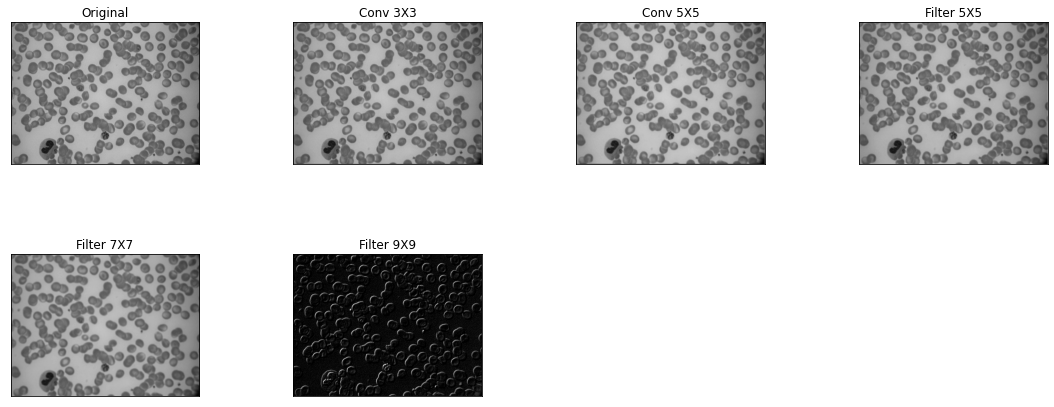

In [ ]:

# Crear una nueva figura
plt.figure(1)

# Ajustar la disposición de los subplots
plt.subplots_adjust(top=1.75, bottom=0.3, left=0.10, right=2.5, hspace=0.25, wspace=0.5)

# Mostrar la imagen original en el primer subplot
plt.subplot(241)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

# Mostrar la imagen convolucionada con el kernel de promedio 3x3 en el segundo subplot
plt.subplot(242)
plt.imshow(imgC1, cmap='gray')
plt.title('Conv 3X3')
plt.xticks([])
plt.yticks([])

# Mostrar la imagen convolucionada con el kernel de promedio 5x5 en el tercer subplot
plt.subplot(243)
plt.imshow(imgC2, cmap='gray')
plt.title('Conv 5X5')
plt.xticks([])
plt.yticks([])

# Mostrar la imagen filtrada con el kernel de promedio 5x5 en el cuarto subplot
plt.subplot(244)
plt.imshow(imgF2, cmap='gray')
plt.title('Filter 5X5')
plt.xticks([])
plt.yticks([])

# Mostrar la imagen filtrada con el kernel de promedio 7x7 en el quinto subplot
plt.subplot(245)
plt.imshow(imgF3, cmap='gray')
plt.title('Filter 7X7')
plt.xticks([])
plt.yticks([])

# Mostrar la imagen filtrada con el kernel personalizado 3x3 en el sexto subplot
plt.subplot(246)
plt.imshow(imgF4, cmap='gray')
plt.title('Filter 9X9')
plt.xticks([])
plt.yticks([])

# Mostrar todos los subplots juntos
plt.show()


In [ ]:
img2 = cv2.imread('/home/juan/Documentos/Documentos_UN/2024-1/Clases/Tecnicas_de_IA/tecinas_IA/Talleres/Taller_2/sin-infectar.jpg',0)
img3 = cv2.imread('/home/juan/Documentos/Documentos_UN/2024-1/Clases/Tecnicas_de_IA/tecinas_IA/Talleres/Taller_2/plasmodium_falciparum.png',0)

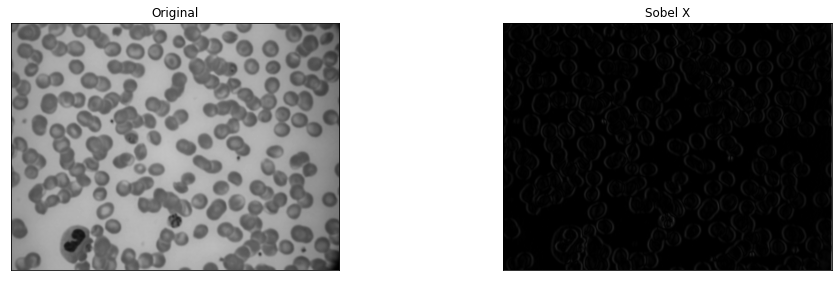

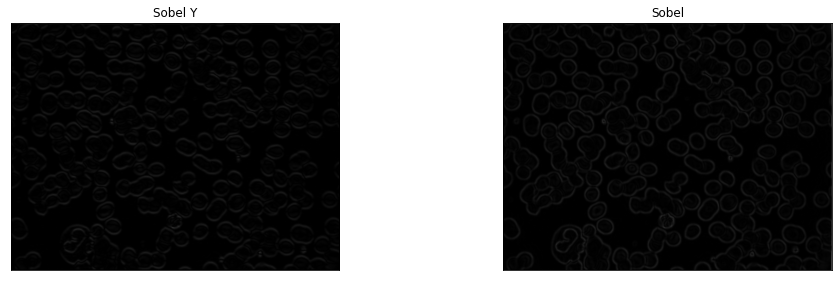

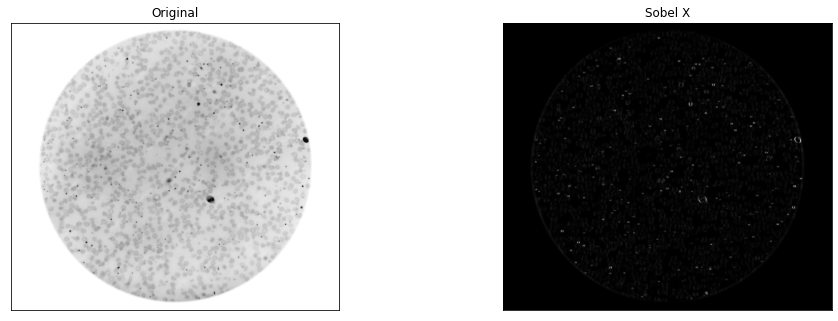

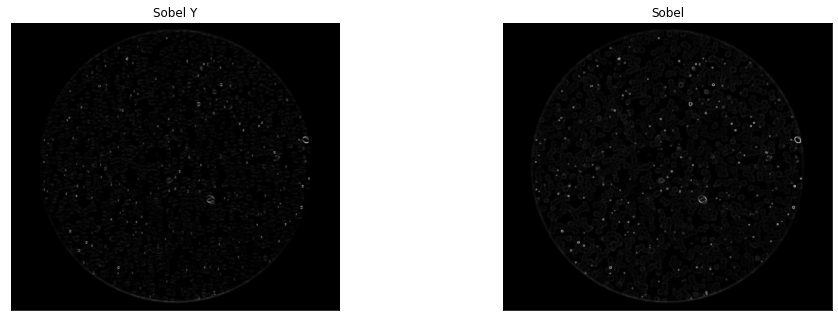

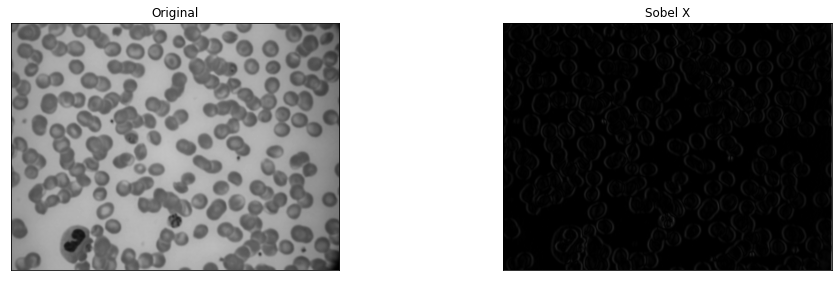

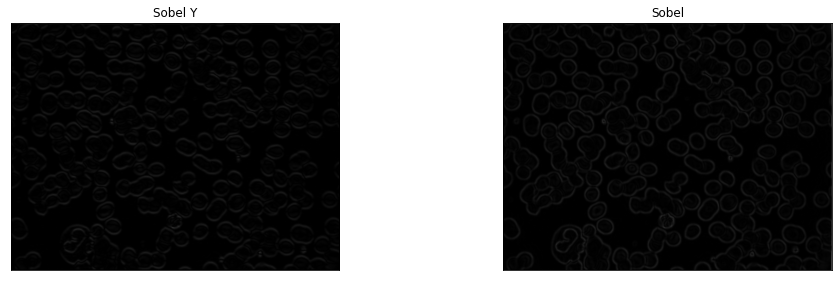

In [ ]:
# Primero se aplican diferentes filtros de suavizado lineal, donde su principio se basa en igualar los pixeles por medio de filtros pasa bajos para obtener bordes más suaves. Sin embargo, en las 3 imágenes se puede apreciar que no son de mucha ayuda, pues como objetivo se tiene que se desean diferenciar lo más posible los bordes para poder detectar la curvatura del tumor.

# Tomando la primera imagen como ejemplo, podemos detectar que al aumentar los núcleos cuadrados hasta 9, se pierde la definición de las costillas, algo que aplicado a la búsqueda de un tumor puede ser fatal.

# Sera necesario analizar opciones que involucren detección de bordes, o filtros de suavizado no lineales como la mediana para poder eliminar el ruido y observar una forma más definida de los cuerpos extraños.

# Filtro de realce (Detección de bordes).

def getSobel(img):

    sobelx = abs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
    sobely = abs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,2,2),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.subplot(1,2,2),plt.imshow(sobelx+sobely,cmap = 'gray')
    plt.title('Sobel'), plt.xticks([]), plt.yticks([])
    plt.show()

getSobel(cv2.bilateralFilter(img,9,75,75))

getSobel(cv2.bilateralFilter(img2,9,75,75))

getSobel(cv2.bilateralFilter(img3,9,75,75))


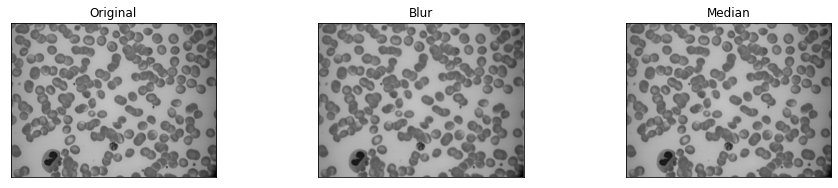

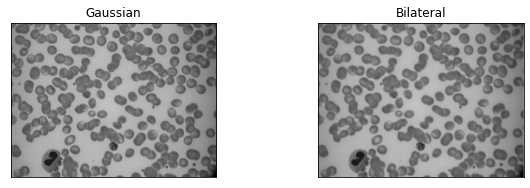

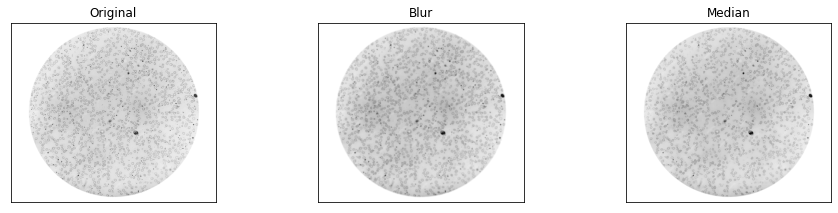

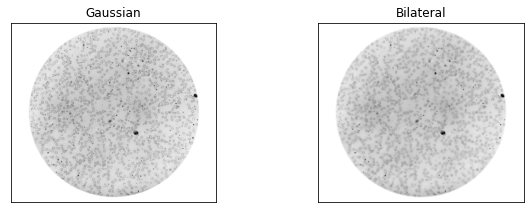

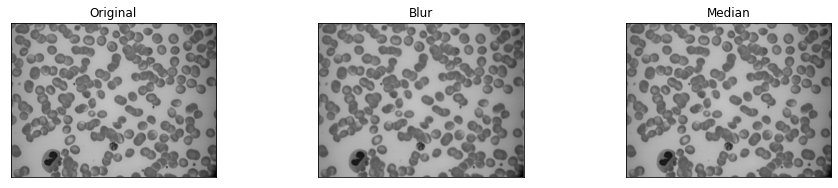

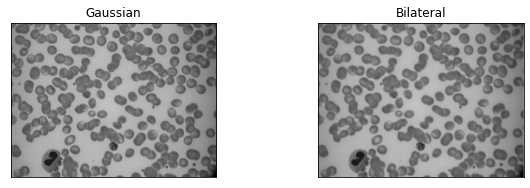

In [ ]:
# Para los filtros de definición de borde, solo se realizó el análisis por medio del filtro de Sobel, por el cual se busca detectar bordes definidos. Aquí buscamos obtener dos matrices como gradientes de intensidad: Sobel X y Sobel Y para poder encontrar la magnitud de su gradiente la cual corresponde a Sobel.
# Como resultado se obtuvo imágenes no tan claras
# Filtros no Lineales (Suavizado).

def showSmoothings(img):

    #Blur: You can change the kernel size as you want
    sal1 = cv2.blur(img,(5,5))

    #Median
    sal2 = cv2.medianBlur(img,5)

    #Gaussian
    sal3 = cv2.GaussianBlur(img,(5,5), 0)

    #Bilateral
    sal4 = cv2.bilateralFilter(img,9,75,75)

    #Visualization
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(231),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(232),plt.imshow(sal1,cmap = 'gray')
    plt.title('Blur'), plt.xticks([]), plt.yticks([])

    plt.subplot(233),plt.imshow(sal2,cmap = 'gray')
    plt.title('Median'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(234),plt.imshow(sal3,cmap = 'gray')
    plt.title('Gaussian'), plt.xticks([]), plt.yticks([])

    plt.subplot(235),plt.imshow(sal4,cmap = 'gray')
    plt.title('Bilateral'), plt.xticks([]), plt.yticks([])

    plt.show()

showSmoothings(img)

showSmoothings(img2)

showSmoothings(img3)

# Entrando a analizar los filtros de suavizado no lineales, se puede apreciar que la mediana y la gaussiana son las que más van a destacar por su suavizado, pues permiten una mayor claridad en el análisis de cuerpos sospechosos en los pulmones. Principalmente gracias al ruido que ayudan a suprimir, permitiendo ver los bordes más definidos.

# Es importante aclarar que, como primer paso, pueden ayudar visualmente a un profesional de la salud a detectar cuerpos extraños, sin embargo para futuras entregas, se buscara poder complementar esta visualización con herramientas más claras y precisas.


In [6]:
#El anàlisis de los filtros Prewitt destaca su capacidad para detectar bordes en una imagen mediante la convolución con kernels diseñados para capturar gradientes en diferentes direcciones.
#La implementación proporcionada muestra cómo se aplican estos kernels en ocho direcciones diferentes para resaltar los bordes verticales, horizontales y diagonales en las imagenes de frotis de sangre.
#Este enfoque permite una detección robusta de bordes en diversas orientaciones, lo cual podria ser clave poseriormente en la clasificaciòn de los tipo de virus.

#En resumen, se proporciona una comprensión clara de cómo funcionan los filtros Prewitt para la detección de bordes en imágenes.
# Se destaca la capacidad para resaltar características importantes y su implementación efectiva mediante convolución y cálculos de gradiente.
#Este enfoque es fundamental en muchas aplicaciones de procesamiento de imágenes, como la segmentaciòn.
#Para el caso de las imagenes implementadas, sera util al momento de realizar el anàlisis de caracteristicas de las anomalias de las imagenes de muestras de frotis de sangre.
